In [1]:
import numpy as np
import pandas as pd
# Visualisation
import matplotlib.pyplot as plt
# Dataset exploring
import os
# Dataset generation

from keras.preprocessing.image import ImageDataGenerator
# Transfert learning
from keras.applications import VGG16
# Optimizer
from keras.optimizers import Adam
# Keras layers
from keras.layers import Input, Dense, Dropout, Flatten, AveragePooling2D
# Keras model
from keras.models import Model

In [2]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import pickle

In [3]:
def load_rand():
    X=[]
    dir_path="C:/Users/manha/Downloads/Fruit/Fruit/train"
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X

In [4]:
X=load_rand()

 50%|██████████████████████████████████████████                                          | 3/6 [00:00<00:00, 28.98it/s]

fresh apples
fresh banana
fresh orange
rotten apples
rotten banana
rotten oranges


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 29.79it/s]


In [5]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [6]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['rottenoranges', 'rottenapples', 'freshbanana', 'freshoranges', 'rottenbanana', 'freshapples']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

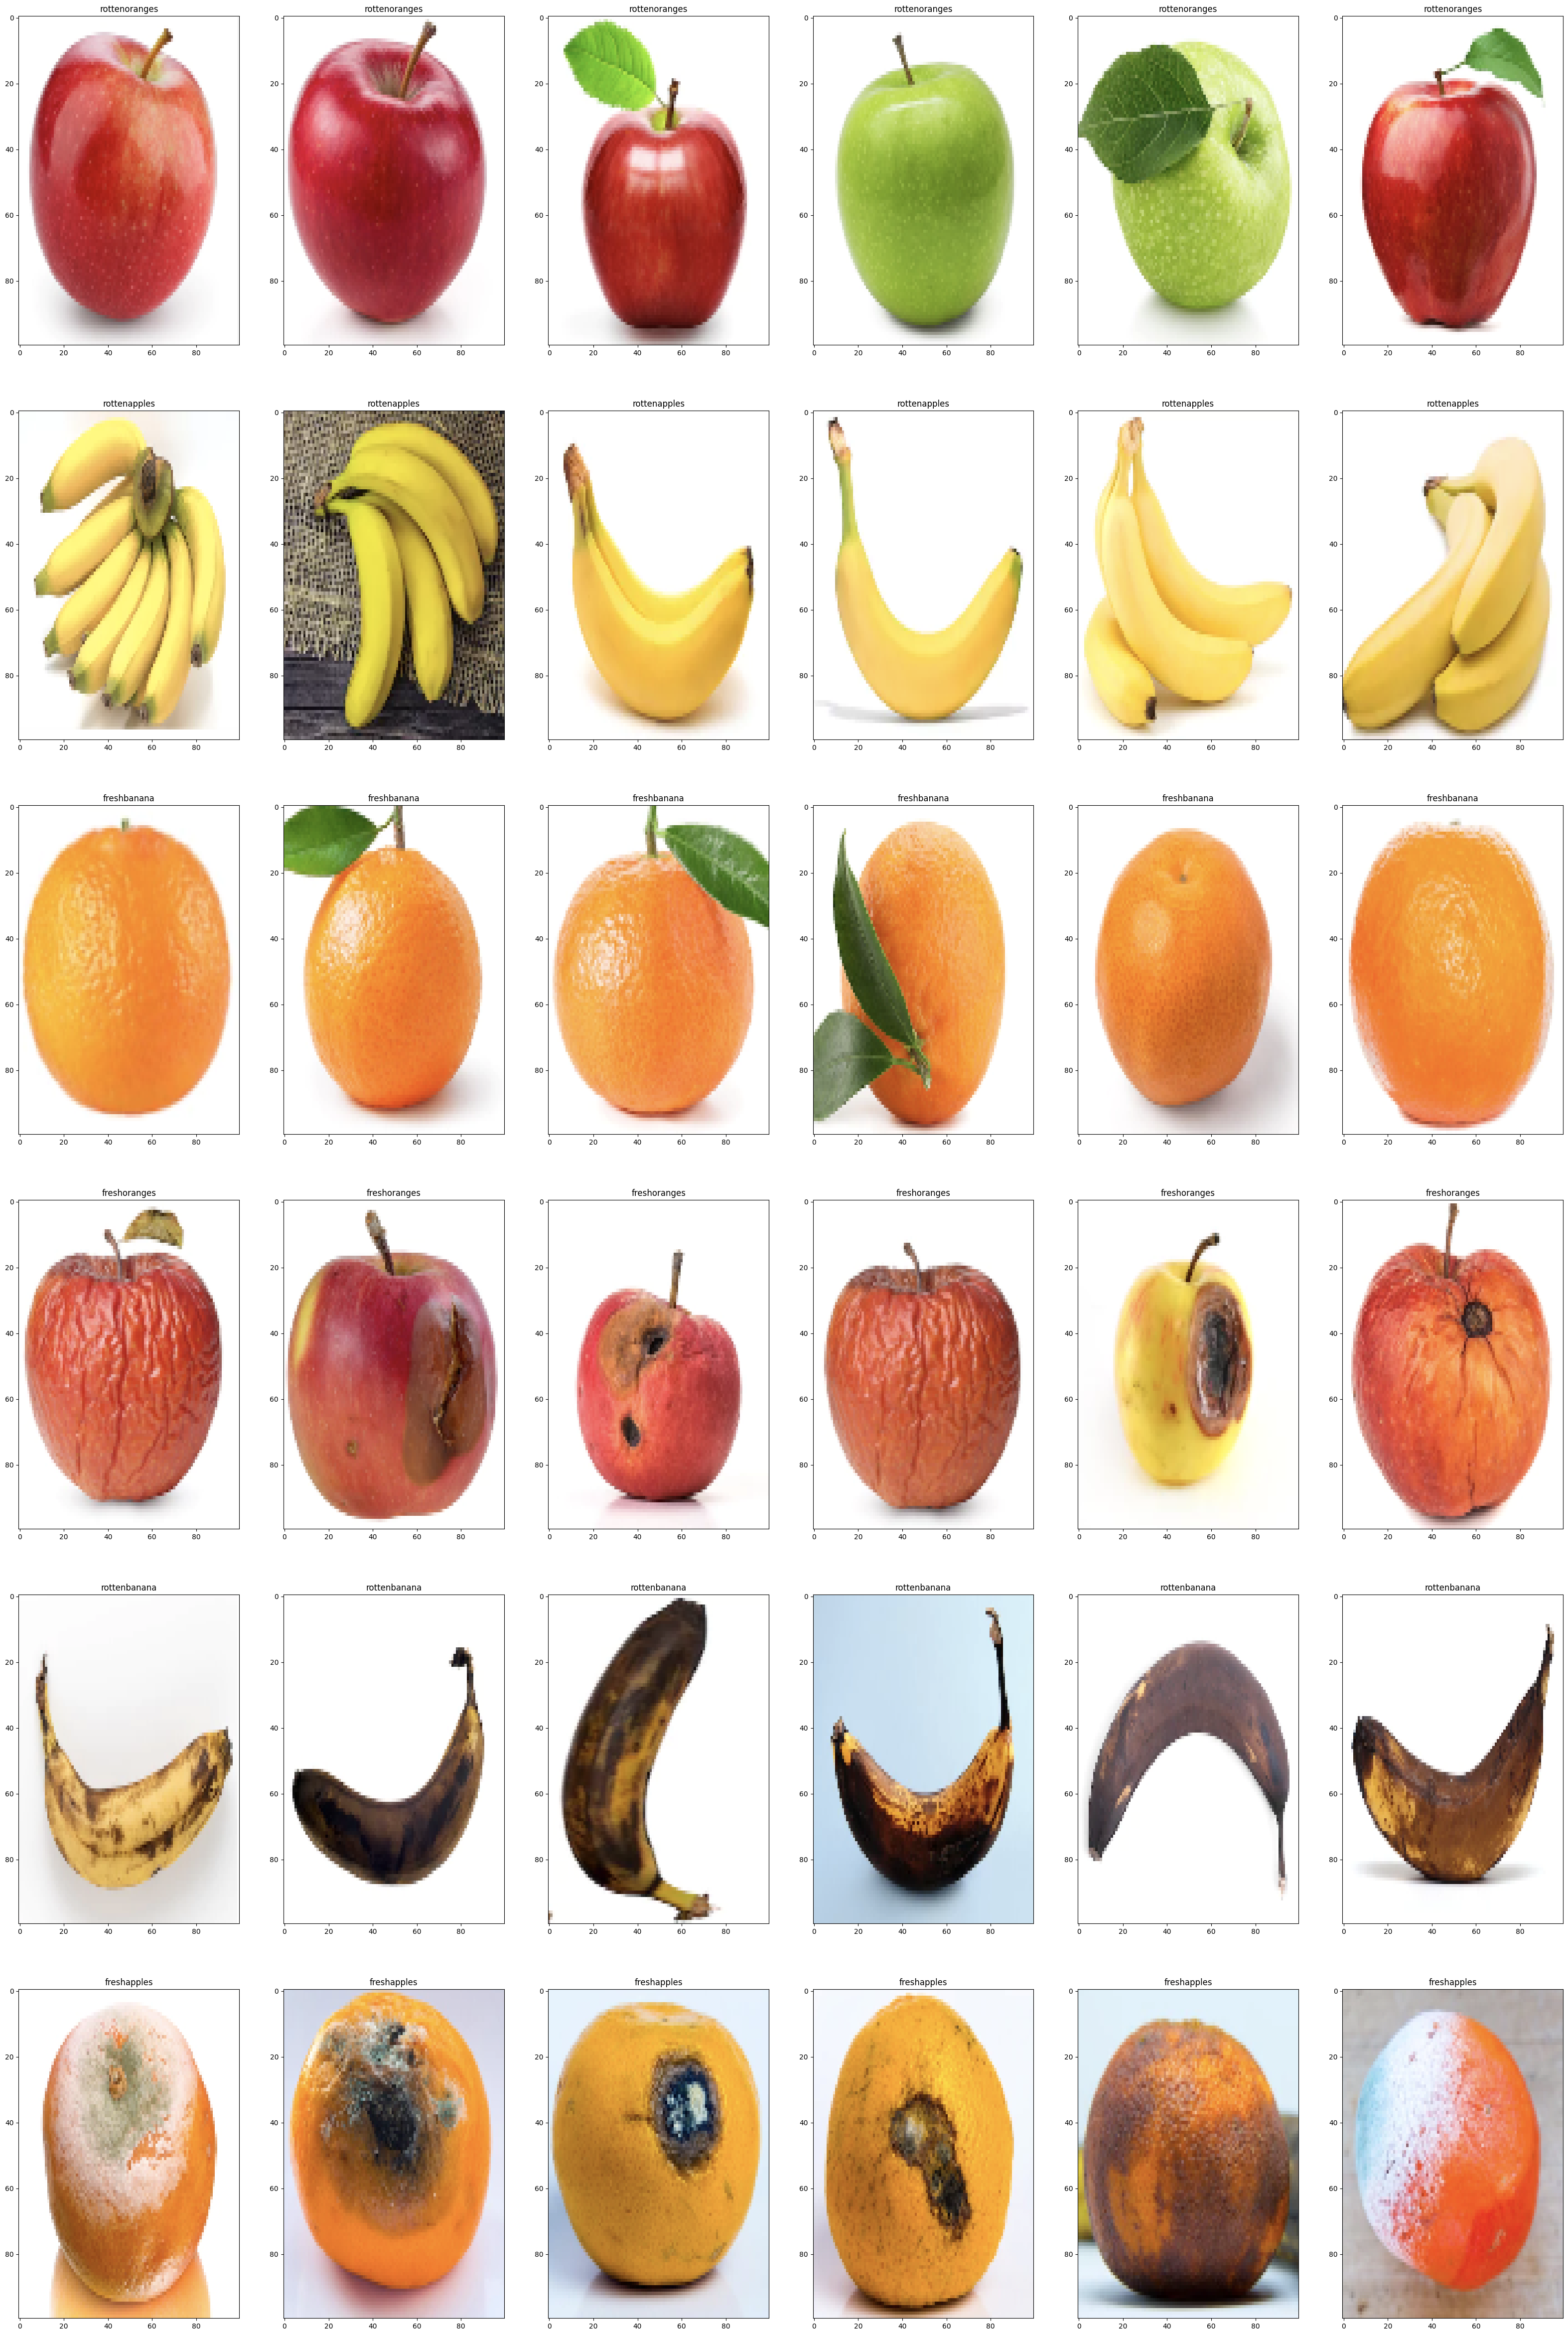

In [7]:
show_subpot(X)

In [8]:
del X

In [9]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir("C:/Users/manha/Downloads/Fruit/Fruit/train")):
        if quality[0] in cata:
            path_main=os.path.join("C:/Users/manha/Downloads/Fruit/Fruit/train",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join("C:/Users/manha/Downloads/Fruit/Fruit/train",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y


In [10]:
X,Y=load_rottenvsfresh()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 34.20it/s]


Shuffling your data.....


100%|███████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 36019.79it/s]


In [11]:
Y=np.array(Y)
X=np.array(X)

In [12]:
y_ser=pd.Series(Y)
y_ser.value_counts()

0    18
1    18
Name: count, dtype: int64

In [13]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir("C:/Users/manha/Downloads/Fruit/Fruit/test")):
        if quality[0] in cata:
            path_main=os.path.join("C:/Users/manha/Downloads/Fruit/Fruit/test",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join("C:/Users/manha/Downloads/Fruit/Fruit/test",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [14]:
X_val,Y_val=load_rottenvsfresh_valset()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 27.56it/s]


Shuffling your data.....


100%|██████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<?, ?it/s]


In [15]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

0    18
1    18
Name: count, dtype: int64

In [16]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

#model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 100, 100, 32)      128       
 Normalization)                                                  
                                                                 
 separable_conv2d (Separabl  (None, 100, 100, 32)      1344      
 eConv2D)                                                        
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 50, 50, 32)        128       
 chNormalization)                                       

In [19]:
import tensorflow as tf

In [20]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/manha/Downloads/Fruit/Fruit/working/rotten.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

model.compile(loss=keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])


In [21]:
X=X/255.0
X_val=X_val/255.0

In [22]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 5,
                 callbacks=[check_point])


Epoch 1/5
2/2 [==============================] - ETA: 0s - loss: 2.0539 - accuracy: 0.6944
Epoch 1: val_loss improved from inf to 0.69599, saving model to C:/Users/manha/Downloads/Fruit/Fruit/working\rotten.h5
2/2 [==============================] - 4s 899ms/step - loss: 2.0539 - accuracy: 0.6944 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 2/5


C:\Users\manha\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - ETA: 0s - loss: 3.2447 - accuracy: 0.5278
Epoch 2: val_loss did not improve from 0.69599
2/2 [==============================] - 1s 604ms/step - loss: 3.2447 - accuracy: 0.5278 - val_loss: 0.7306 - val_accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - ETA: 0s - loss: 1.1469 - accuracy: 0.8056
Epoch 3: val_loss did not improve from 0.69599
2/2 [==============================] - 1s 582ms/step - loss: 1.1469 - accuracy: 0.8056 - val_loss: 0.8697 - val_accuracy: 0.5000
Epoch 4/5
2/2 [==============================] - ETA: 0s - loss: 1.0183 - accuracy: 0.8333
Epoch 4: val_loss did not improve from 0.69599
2/2 [==============================] - 1s 571ms/step - loss: 1.0183 - accuracy: 0.8333 - val_loss: 1.1635 - val_accuracy: 0.5000
Epoch 5/5
2/2 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9722
Epoch 5: val_loss did not improve from 0.69599
2/2 [==============================] - 1s 611ms/step - loss: 0.0803 - a

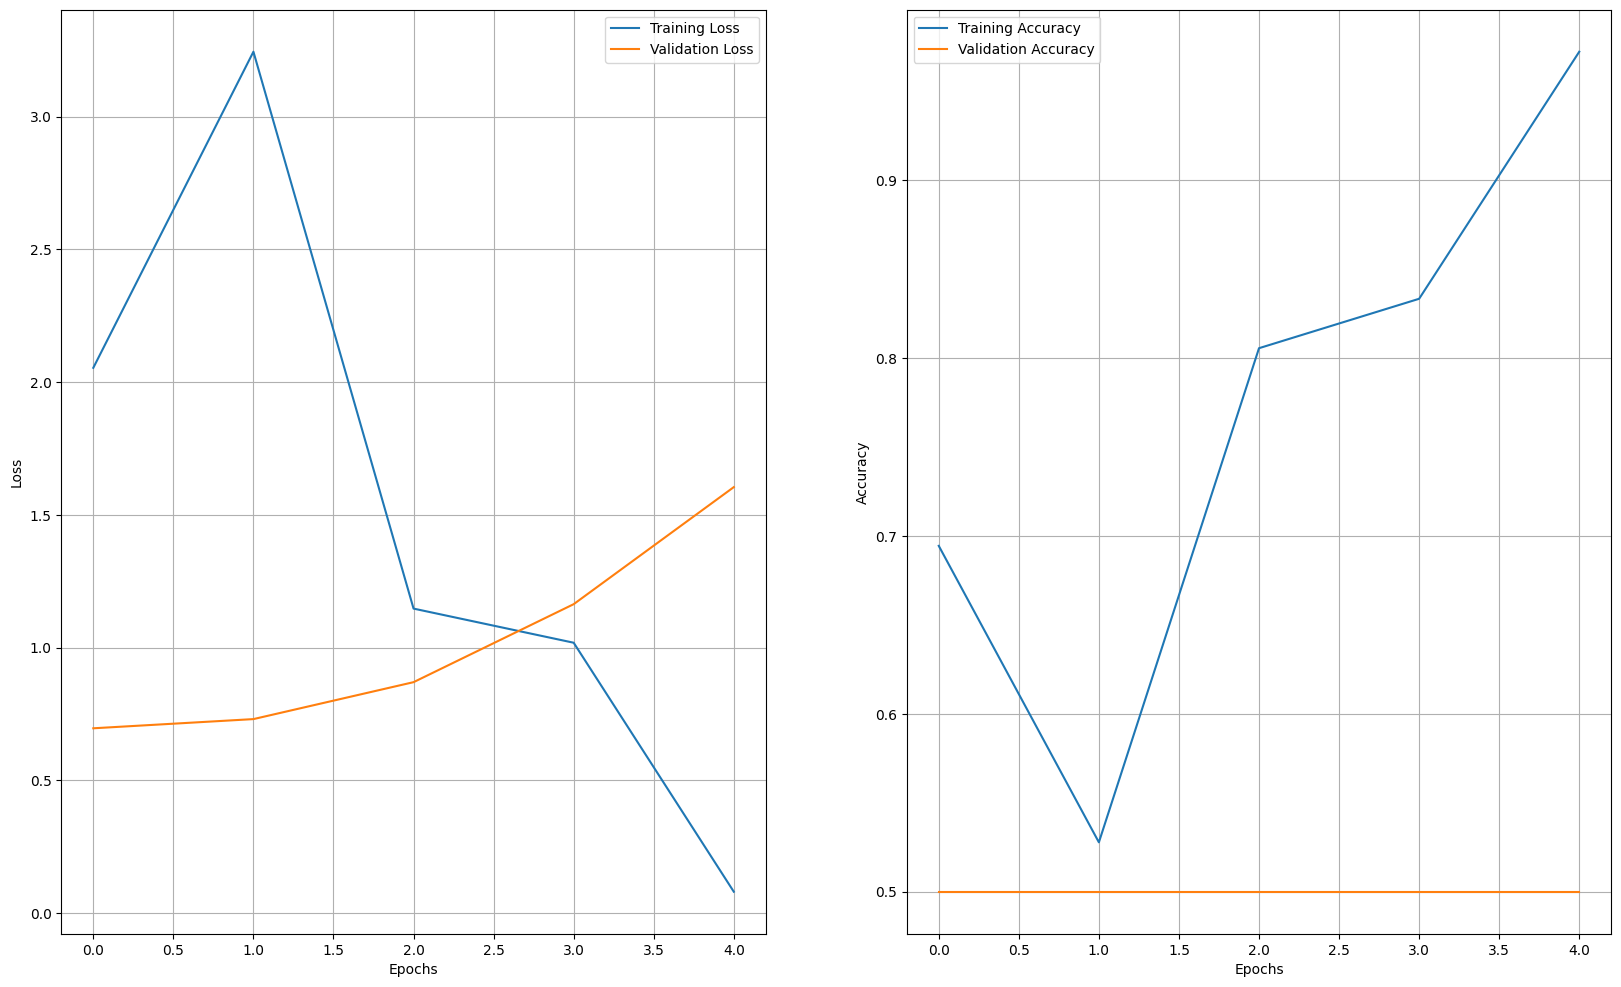

In [23]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [24]:
model.evaluate(X_val,Y_val)

2/2 [==============================] - 0s 34ms/step - loss: 1.6045 - accuracy: 0.5000


[1.6045117378234863, 0.5]

In [25]:
model.save('C:/Users/manha/Downloads/Fruit/Fruit/working/rottenvsfresh.h5')

In [26]:
from keras.models import Model, load_model

In [27]:
new_model=load_model('C:/Users/manha/Downloads/Fruit/Fruit/working/rottenvsfresh.h5')

In [28]:
new_model.evaluate(X_val,Y_val)

2/2 [==============================] - 0s 39ms/step - loss: 1.6045 - accuracy: 0.5000


[1.6045117378234863, 0.5]

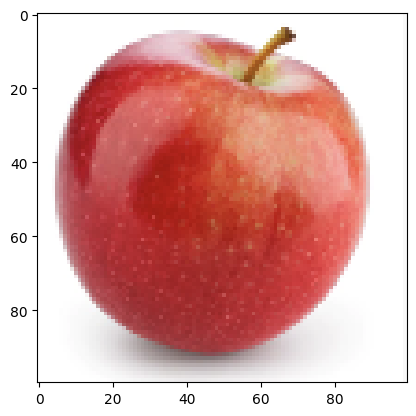

In [29]:
plt.imshow(X_val[0])

In [30]:
model.predict(X_val[0].reshape(1,100,100,3))

1/1 [==============================] - 0s 155ms/step


array([[0.04215067]], dtype=float32)

In [31]:
# Load the new image for prediction
from PIL import Image
new_image_path='C:/Users/manha/Downloads/Fruit/Fruit/train/fresh apples/train1.png'
new_image = Image.open(new_image_path)
new_image = new_image.resize((30, 30))  # Resize the image to match the input size of the model
new_image = np.array(new_image)
predictions = model.predict(X_val[0].reshape(1,100,100,3))
predicted_class = np.argmax(predictions)

1/1 [==============================] - 0s 25ms/step


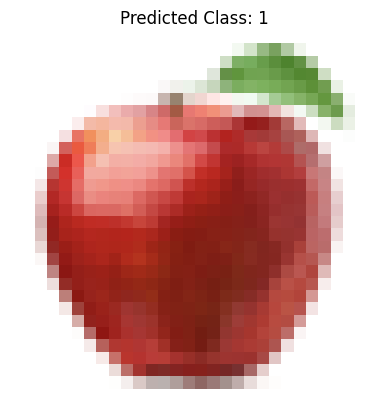

In [32]:
class_names = ['1']
# Get the predicted class name
predicted_class_name = class_names[predicted_class]
# Display the new image
plt.imshow(new_image)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()

In [33]:
# Load the new image for prediction
from PIL import Image
new_image_path="C:/Users/manha/Downloads/Fruit/Fruit/train/fresh banana/banana5.png"
new_image = Image.open(new_image_path)
new_image = new_image.resize((30, 30))  # Resize the image to match the input size of the model
new_image = np.array(new_image)
predictions = model.predict(X_val[0].reshape(1,100,100,3))
predicted_class = np.argmax(predictions)

1/1 [==============================] - 0s 32ms/step


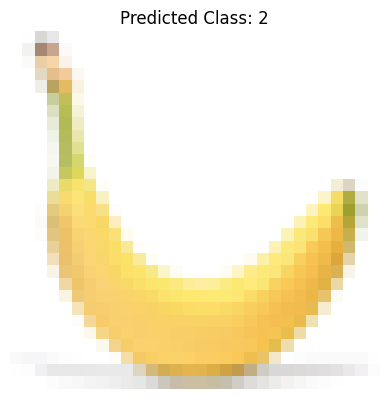

In [34]:
class_names = ['2']
# Get the predicted class name
predicted_class_name = class_names[predicted_class]
# Display the new image
plt.imshow(new_image)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()

In [35]:
# Load the new image for prediction
from PIL import Image
new_image_path='C:/Users/manha/Downloads/Fruit/Fruit/train/fresh orange/orange5.png'
new_image = Image.open(new_image_path)
new_image = new_image.resize((30, 30))  # Resize the image to match the input size of the model
new_image = np.array(new_image)
predictions = model.predict(X_val[0].reshape(1,100,100,3))
predicted_class = np.argmax(predictions)

1/1 [==============================] - 0s 36ms/step


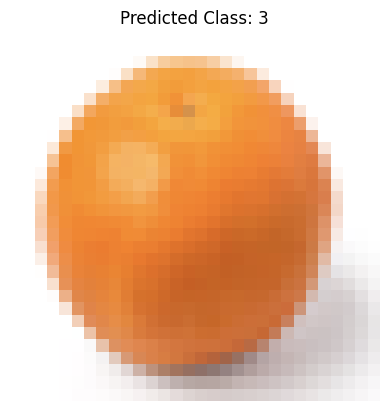

In [36]:
class_names = ['3']
# Get the predicted class name
predicted_class_name = class_names[predicted_class]
# Display the new image
plt.imshow(new_image)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()

In [37]:
# Load the new image for prediction
from PIL import Image
new_image_path='C:/Users/manha/Downloads/Fruit/Fruit/train/rotten apples/apples5.png'
new_image = Image.open(new_image_path)
new_image = new_image.resize((30, 30))  # Resize the image to match the input size of the model
new_image = np.array(new_image)
predictions = model.predict(X_val[0].reshape(1,100,100,3))
predicted_class = np.argmax(predictions)

1/1 [==============================] - 0s 33ms/step


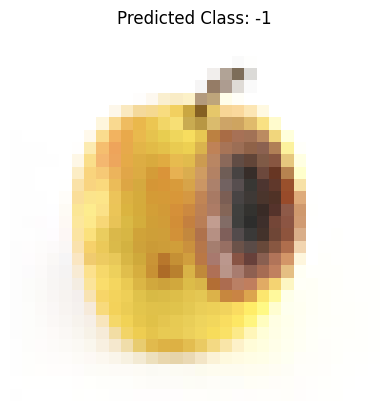

In [38]:
class_names = ['-1']
# Get the predicted class name
predicted_class_name = class_names[predicted_class]
# Display the new image
plt.imshow(new_image)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()

In [39]:
# Load the new image for prediction
from PIL import Image
new_image_path='C:/Users/manha/Downloads/Fruit/Fruit/train/rotten banana/banana5.png'
new_image = Image.open(new_image_path)
new_image = new_image.resize((30, 30))  # Resize the image to match the input size of the model
new_image = np.array(new_image)
predictions = model.predict(X_val[0].reshape(1,100,100,3))
predicted_class = np.argmax(predictions)

1/1 [==============================] - 0s 32ms/step


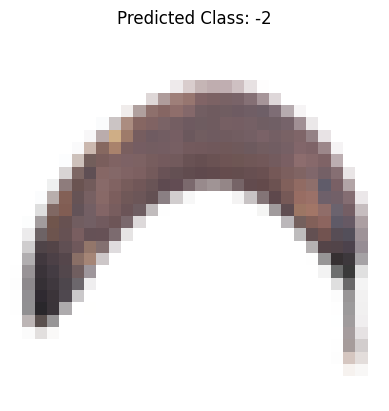

In [40]:
class_names = ['-2']
# Get the predicted class name
predicted_class_name = class_names[predicted_class]
# Display the new image
plt.imshow(new_image)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()

In [41]:
# Load the new image for prediction
from PIL import Image
new_image_path='C:/Users/manha/Downloads/Fruit/Fruit/train/rotten oranges/oranges5.png'
new_image = Image.open(new_image_path)
new_image = new_image.resize((30, 30))  # Resize the image to match the input size of the model
new_image = np.array(new_image)
predictions = model.predict(X_val[0].reshape(1,100,100,3))
predicted_class = np.argmax(predictions)

1/1 [==============================] - 0s 32ms/step


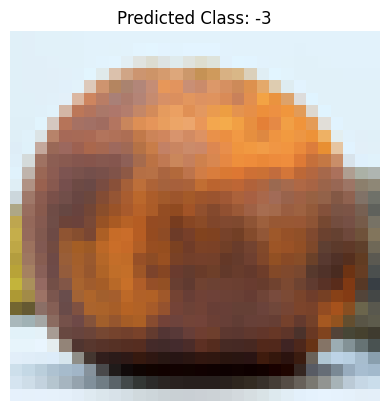

In [42]:
class_names = ['-3']
# Get the predicted class name
predicted_class_name = class_names[predicted_class]
# Display the new image
plt.imshow(new_image)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()

In [ ]:
from tkinter import filedialog
from PIL import ImageTk, Image  
from PIL import Image
import tkinter as tk
root= tk.Tk()


canvas1 = tk.Canvas(root, width = 1000, height = 1000,bg="Yellow")
canvas1.pack()

label1 = tk.Label(root, text='Rotten Fruit Detection', font=("Courier",36),bg='black',fg='Green')
canvas1.create_window(450, 50, window=label1)
label2 = tk.Label(root, text='Farmer Buddy App ', font=("Courier",36),bg='black',fg='Green')
canvas1.create_window(450, 50, window=label2)

def upload_file():
    global img
    global filename
    global b2
    f_types = [('png Files', '*.png')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    img=Image.open(filename)
    image2=img.resize((300,300),Image.ANTIALIAS)
    img = ImageTk.PhotoImage(image2)
    b2 =tk.Label(root,image=img) # using Button 
    canvas1.create_window(250, 380, window=b2)

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def prediction():
    img = image.load_img(filename,target_size=(256,256))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    new_image = img.resize((30, 30))  # Resize the image to match the input size of the model
    new_image = np.array(new_image)
    predictions = model.predict(X_val[0].reshape(1,100,100,3))
    predicted_class = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class]
    print(predicted_class_name)
    if predicted_class_name == '1':
        print('fresh apple')
        label3 = tk.Label(root, text='Fresh apple', font=("Courier",40),fg='red')
        canvas1.create_window(700, 600, window=label3)
    elif predicted_class_name == '2':
        print('fresh banana')
        label3 = tk.Label(root, text='Fresh banana', font=("Courier",40),fg='red')
        canvas1.create_window(700, 600, window=label3)
    elif predicted_class_name == '3':
        print('fresh orange')
        label3 = tk.Label(root, text='Fresh orange', font=("Courier",40),fg='red')
        canvas1.create_window(700, 600, window=label3)
    elif predicted_class_name == '-1':
        print('rotten apple')
        label3 = tk.Label(root, text='rotten apple', font=("Courier",40),fg='red')
        canvas1.create_window(700, 600, window=label3)
    elif predicted_class_name == '-2':
        print('rotten banana')
        label3 = tk.Label(root, text='rotten banana', font=("Courier",40),fg='red')
        canvas1.create_window(700, 600, window=label3)
    elif predicted_class_name == '-3':
        print('rotten orange')
        label3 = tk.Label(root, text='rotten orange', font=("Courier",40),fg='red')
        canvas1.create_window(700, 600, window=label3)
    else:
        print('Detection Failed')
        label4 = tk.Label(root, text='Detection Failed', font=("Courier",40),fg='red')
        canvas1.create_window(700, 600, window=label4)

btn1 = tk.Button(root, text='Upload Image/Video', command=upload_file, bg='cyan',font=("Courier",20))
canvas1.create_window(620, 400, window=btn1)
btn2 = tk.Button(root, text='Detect', command=prediction, bg='green',font=("Courier",20))
canvas1.create_window(700, 200, window=btn2)

root.mainloop()

    
